## 비지도 학습(Unsupervised Learning)
  - 정답이 없는 데이터를 군집화하여 새로운 데이터에 대한 결과를 예측하는 방법
  - 종류: 클러스터링, k-means 

## 군집화(clustering)

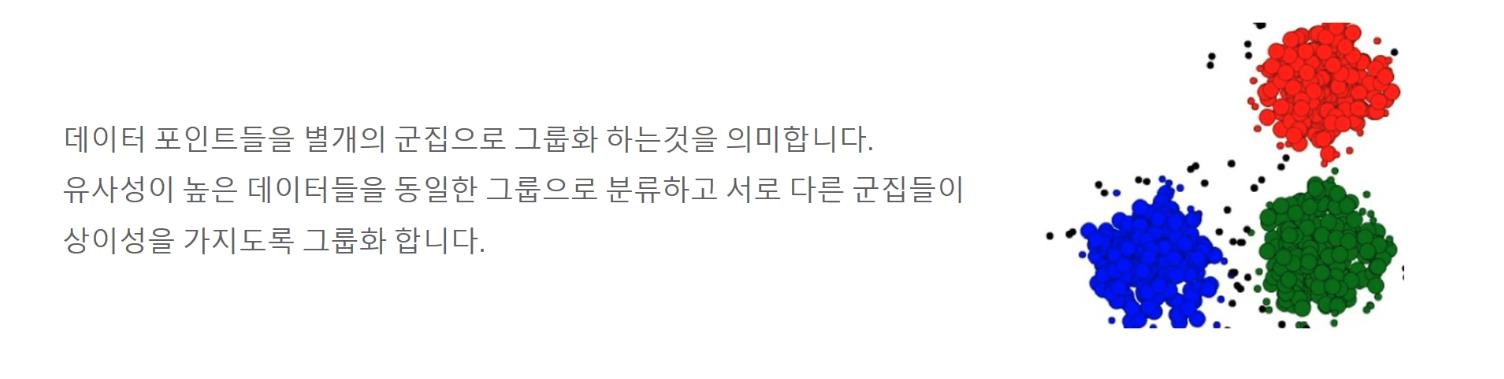

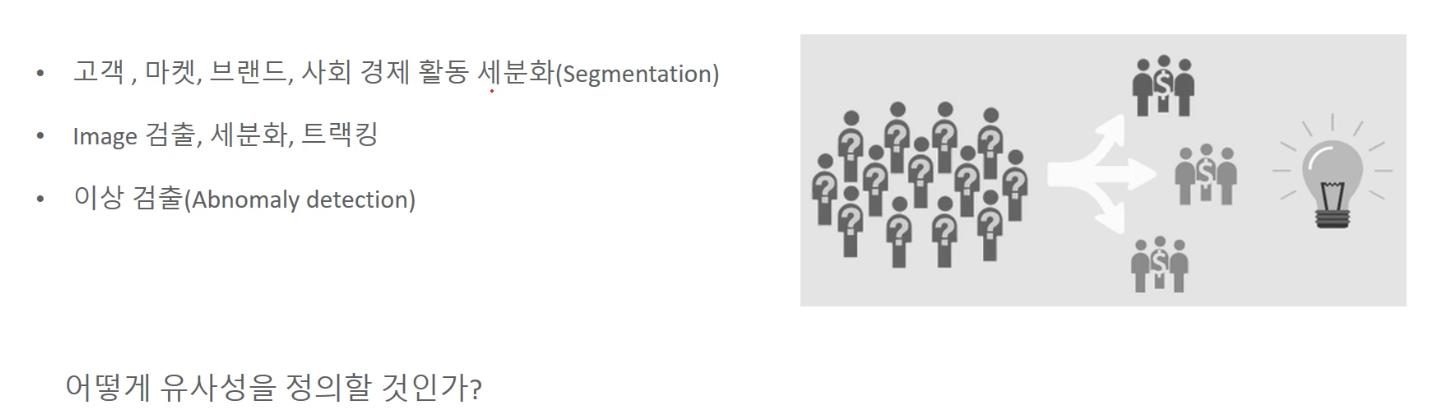

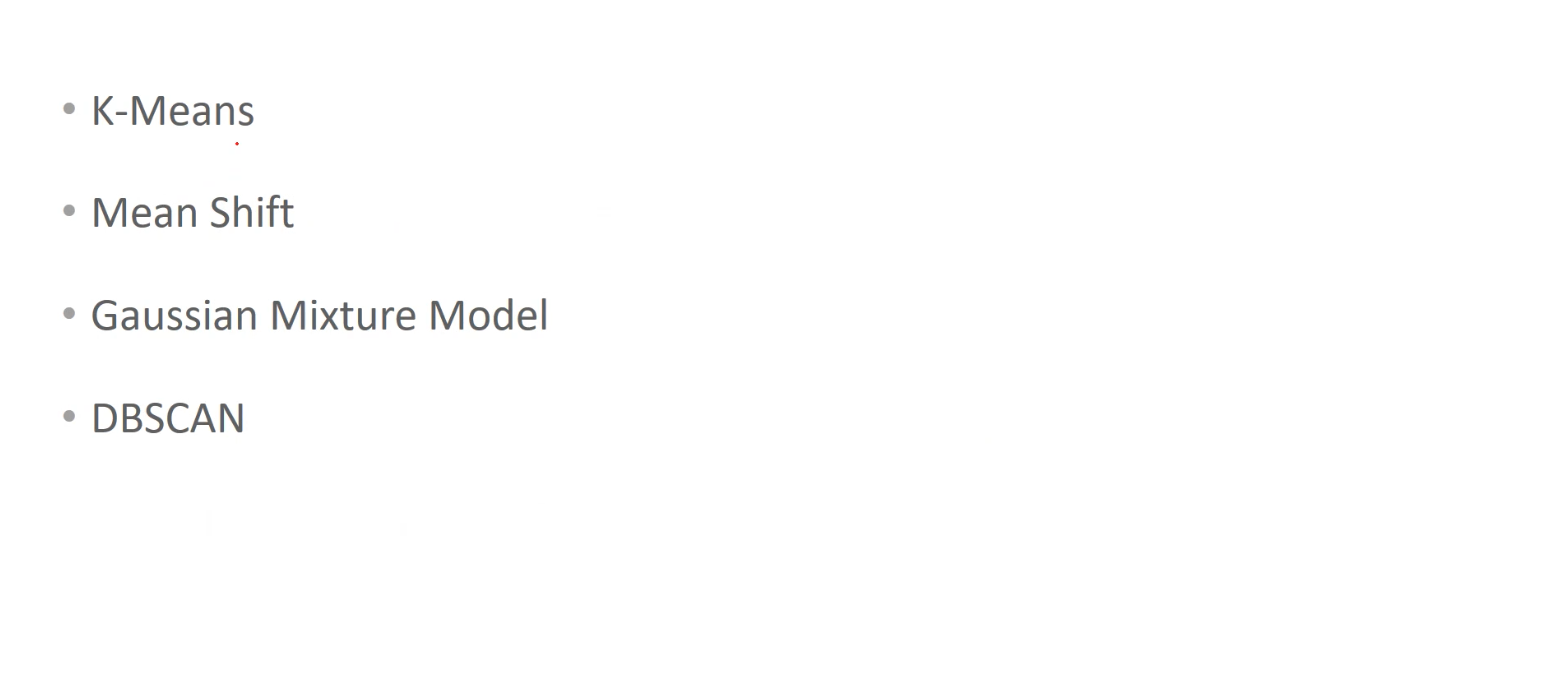
- centroid(군집 중심점) 기반
- centroid(군집 중심점) 기반
- 데이터 정규분포 기반
- 데이터 밀도 기반

## K-Means clustering

### K-Means clustering 와 PCA는 회사에서 정말 많이 쓰인다.  같이 쓰기도 하기 때문

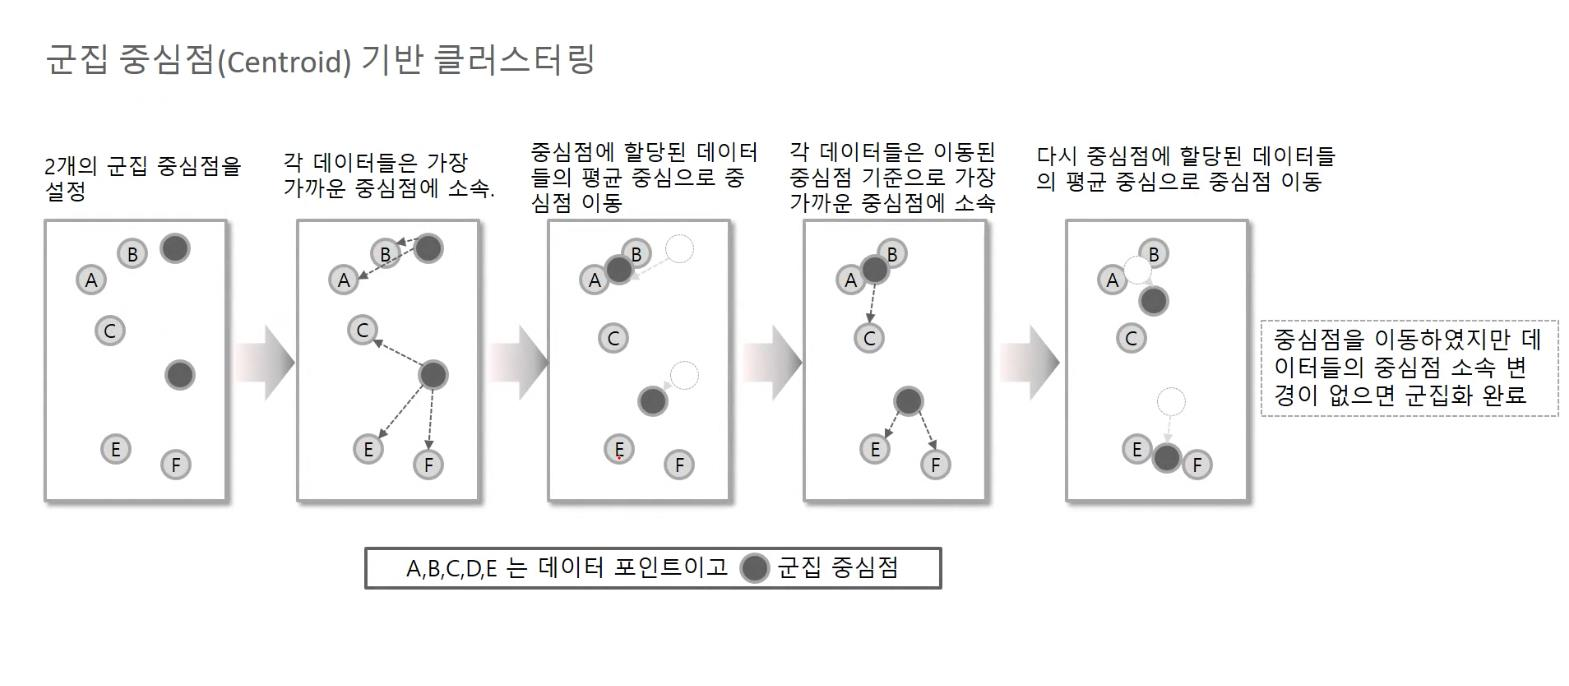

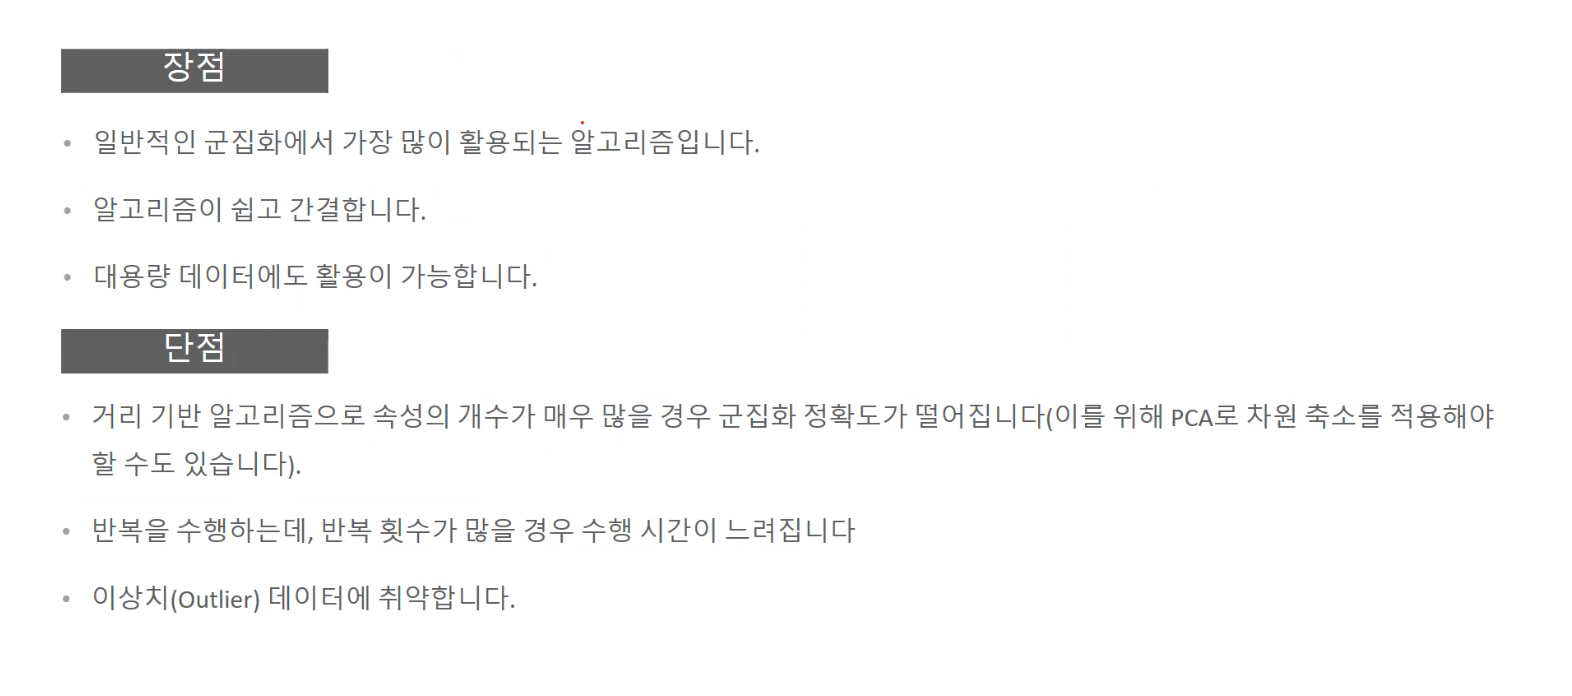

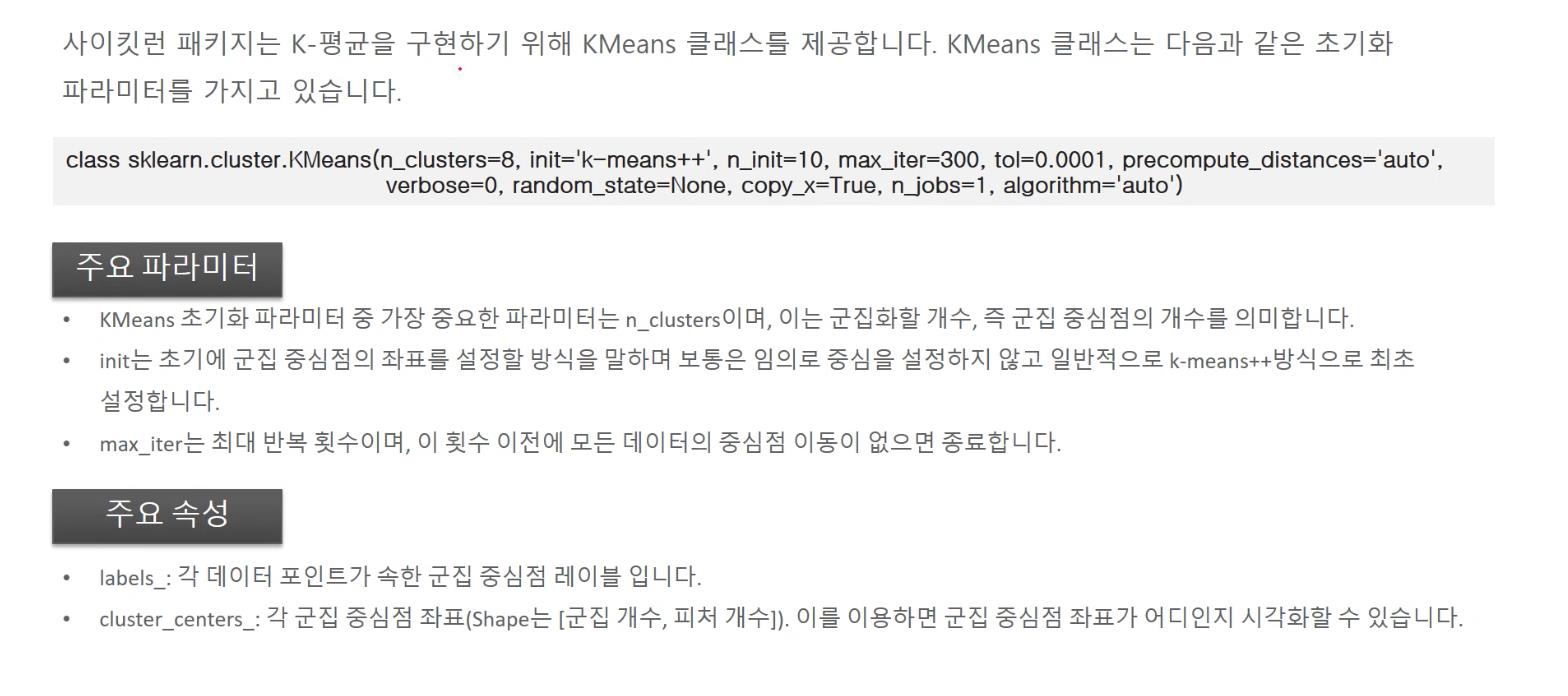

### K-means 와 GMM의 어떤 형태일 때 성능이 더 좋은 가??
 - GMM은 특히 잘 적용이 되는 데이터 분포가 있는데 주로 타원형으로 길게 늘어진 데이터 분포에 적용이 용이하다.
 - Kmeans는 길쭉한 타원형태일 때 더좋은 성능을 가져온다.
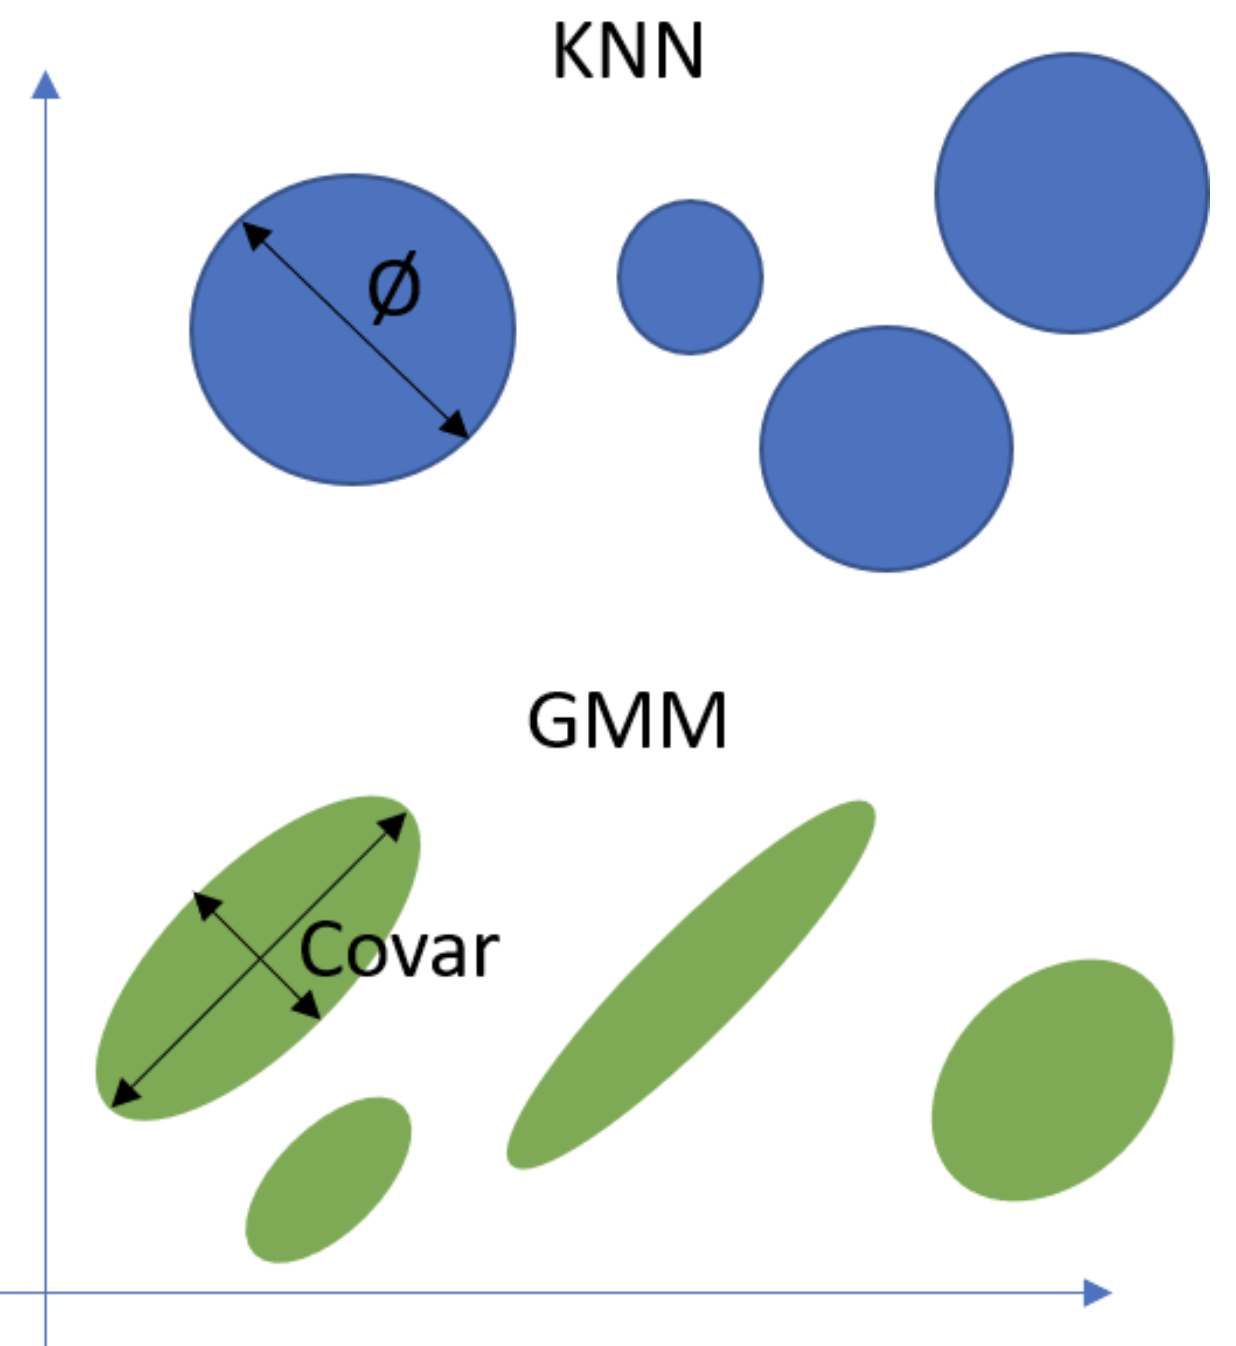

## 붓꽃 데이터 K-Means clustering

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris =load_iris()
irisDF =pd.DataFrame(data =iris.data, columns=['sepel_length','sepel_width','petal_lenth','petal_lenth'])

irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepel_length  150 non-null    float64
 1   sepel_width   150 non-null    float64
 2   petal_lenth   150 non-null    float64
 3   petal_lenth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 붓꽃 데이터에 Kmeans 군집화 수행

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(irisDF)

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=200, n_clusters=3, random_state=0)

### 각데이터들마다 군집 중심정 할당댐

In [3]:
print(kmeans.labels_)
irisDF['cluster']= kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### 타켓별 군집 중심점 확인

In [4]:
irisDF ['target']= iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepel_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepel_length, dtype: int64


### 군집화 결과 시각화(PCA 2차원 변환)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepel_length,sepel_width,petal_lenth,petal_lenth,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


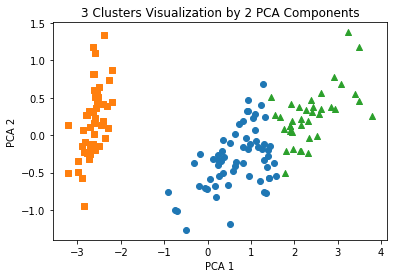

In [6]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### K-means 수행 후 개별 클러스터의 군집 중심 시각화

In [7]:
# 클러스팅 알로리즘 테스트를 위한 데이터 생성

import numpy as np
from sklearn.datasets import make_blobs
#클러스팅할 데이터 생성 (생성할 데이터 200, 데이터 피쳐 갯수 2개, 군집 3개, 데이터 표준편차 0)
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


### y target값 분포를 확인

In [8]:
#y target값 분포를 확인
unique, counts =np.unique(y, return_counts= True)
# 유니크한 값종류, 종류마다의 갯수 
print(unique, counts)  # 타켓값 , 총 200개의 데이터

[0 1 2] [67 67 66]


In [9]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']= y

print(clusterDF.shape)
clusterDF.head()

(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


###  make_blobs로 만들어진 데이터 시각화

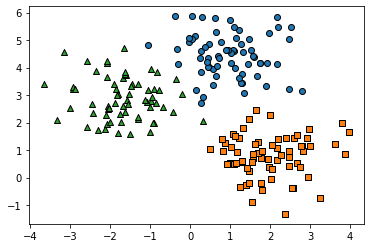

In [10]:
#make_blobs로 만들어진 데이터 시각화
target_list = np.unique(y)

#각 타켓별 scatter plot 의 marker 값

markers= ['o','s','^','P','D','H','x']
#3개의 클러스터 영역으로 구분한  데이터 셋을 생성했기 떄문에 target_list는 [0,1,2]

#target ==0 ,target == 1 ,target ==2로 scatter plot 을 marker 별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']== target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
               edgecolors='k',marker=markers[target])
plt.show()

### KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


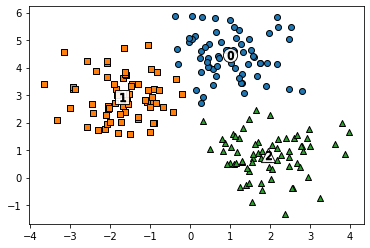

In [11]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

### 클러스터 별로 잘 분류된것을 알수 있다,

In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
